# Pertemuan 5

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Drawing Tool

- Draw a **line** by using the OpenCV function `cv2.line()`
- Draw an **ellipse** by using the OpenCV function `cv2.ellipse()`
- Draw a **rectangle** by using the OpenCV function `cv2.rectangle()`
- Draw a **circle** by using the OpenCV function `cv2.circle()`
- Draw a **filled polygon** by using the OpenCV function `cv2.fillPoly()`
- Write a **text** by using the OpenCV function `cv2.putText()`

#### 1.1 Draw Rectangle (`cv2.rectangle()`)


- Menggunakan method `cv2.rectangle(img, (x0,y0), (xt,yt), (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `(x0, y0)` : top-left-corner rectangle point (tuple)
    - `(xt, yt)` : bottom-right-corner rectangle point (tuple)
    - `(B, G, R)` : rectangle color (tuple)
    - `thickness` : rectangle thickness (if negative, color will be user as fillcolor)
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-box.png" style="width:700"></img>

- draw rectangle

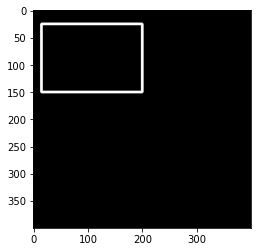

In [8]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

cv2.rectangle(background, # input image
              (15,25),    # (x1, y1)
              (200,150),  # (x2, y2)
              (255,255,255),  # (B, G, R)
              3)          # thickness

plt.imshow(background[:,:,::-1])

- draw filled rectangle

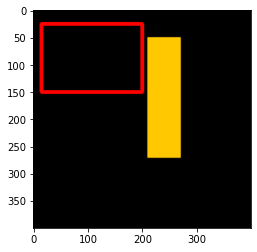

In [9]:
background = np.zeros((400, 400, 3)).astype(np.uint8)

# outline color
cv2.rectangle(background,
              (15,25),    
              (200,150),  
              (0,0,255), 
              5)          

# fill color
cv2.rectangle(background,
              (210,50),   
              (270,270),  
              (0,200,255),
              -1,
               cv2.LINE_AA)           

plt.imshow(background[:,:,::-1])

#### 1.2 Write Text (`cv2.putText()`)


- Menggunakan method `cv2.putText(img, text, (x,y), font_type, font_scale, (B, G, R), thickness, line_type)` 
- untuk :
    - `img` : input image
    - `text` : string to write in image 
    - `(x, y)` : start-left position of text (tuple)
    - `font_type` : 
        - `cv2.FONT_HERSHEY_SIMPLEX` : size sans-serif font
        - `cv2.FONT_HERSHEY_PLAIN` : small size sans-serif font
        - `cv2.FONT_HERSHEY_DUPLEX` : normal size sans-serif font (more complex than FONT_HERSHEY_SIMPLEX)
        - `cv2.FONT_HERSHEY_COMPLEX` : normal size serif font
        - `cv2.FONT_HERSHEY_TRIPLEX` : normal size serif font (more complex than FONT_HERSHEY_COMPLEX)
        - `cv2.FONT_HERSHEY_COMPLEX_SMALL` : smaller version of FONT_HERSHEY_COMPLEX
        - `cv2.FONT_HERSHEY_SCRIPT_SIMPLEX` : hand-writing style font
        - `cv2.FONT_HERSHEY_SCRIPT_COMPLEX` : more complex variant of FONT_HERSHEY_SCRIPT_SIMPLEX
        - `cv2.FONT_ITALIC` : flag for italic font
    - `(B, G, R)` : circle color (tuple)
    - `thickness` : circle thickness  (if negative, color will be user as fillcolor)
    - `line_type` :
        - `cv2.FILLED` : filled line
        - `cv2.LINE_4` : 4-connected line
        - `cv2.LINE_8` : 8-connected line
        - `cv2.LINE_AA` : antialiased line
        
<img src="resource/draw-text.png" style="width:700"></img>

- draw text

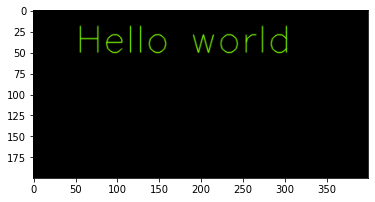

In [15]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

cv2.putText(background, 
            "Hello world", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            1.5,                          
            (0, 255, 127),                
            1,
            cv2.LINE_AA) 

plt.imshow(background[:,:,::-1])

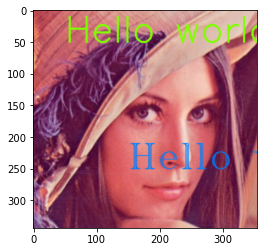

In [20]:
img = cv2.imread("lena.jpg")
cv2.putText(img, 
            "Hello world", 
            (150, 250),                   
            cv2.FONT_HERSHEY_TRIPLEX,     
            1.9,                          
            (255, 127, 0),                
            1,
            cv2.LINE_AA) 

cv2.putText(img, 
            "Hello world 2", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            1.9,                          
            (0, 255, 127),                
            2,
            cv2.LINE_AA) 

plt.imshow(img[:,:,::-1])

### 1.3 Measure Text size before drawing

- menggunakan method `cv2.getTextSize(text, fontFace, fontScale, thickness))`
- mengembalikan dua variabel : 
    - `size` : dimensi (w, h) text 
    - `baseline` : y coord, relative to most bottom text
    
<img src="resource/text_size.png" style="width:700"></img>

In [21]:
cv2.getTextSize("hello", cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

((37, 12), 5)

- **Draw text & Box** menggunakan (x, y) yang sama

<img src="resource/text_n_box.png" style="width:700"></img>

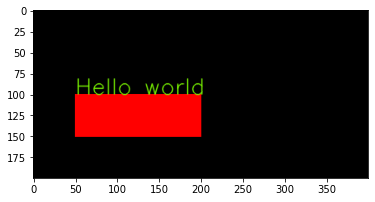

In [22]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

cv2.rectangle(background, # input image
              (50,100),    # (x1, y1)
              (200,150),  # (x2, y2)
              (0,0,255),  # (B, G, R)
              -1)          # thickness

cv2.putText(background, 
            "Hello world", 
            (50, 100),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.9,                          
            (0, 255, 127),                
            1,
            cv2.LINE_AA) 

plt.imshow(background[:,:,::-1])

- **Draw text & box** menggunakan (x,y) + `cv2.textSize()`

<img src="resource/text_n_box_2.png" style="width:700"></img>

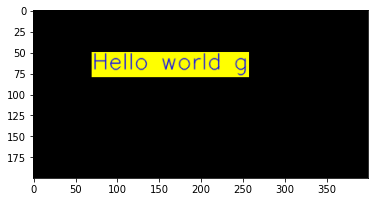

In [25]:
background = np.zeros((200, 400, 3)).astype(np.uint8)

text = "Hello world g"
(w, h), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 1)

cv2.rectangle(background,
              (70,70 - h),  
              (70 + w, 70 + baseline), 
              (0,255,255), 
              -1)        

cv2.putText(background, 
            text, 
            (70, 70),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.9,                          
            (255, 0, 0),                
            1,
            cv2.LINE_AA) 

plt.imshow(background[:,:,::-1])

- Function in Python

In [26]:
def hitung(a, b):
    return a + b

In [28]:
c = hitung(11, 4)

print(c)

15


- Wrap text & box into **function** `draw_label_box()`

In [29]:
def draw_label_box(img, label, x, y):
    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.9, 1)
    cv2.rectangle(img,
                  (x, y - h),  
                  (x + w, y + baseline), 
                  (255,0,255), 
                  -1)        
    cv2.putText(img, 
                label, 
                (x, y),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.9,                          
                (255, 255, 255),                
                1,
                cv2.LINE_AA) 
    return img

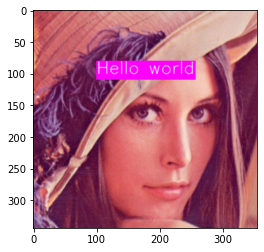

In [31]:
background = cv2.imread('lena.jpg')#np.zeros((400, 400, 3)).astype(np.uint8)

background = draw_label_box(background, "Hello world", 100, 100)

plt.imshow(background[:,:,::-1])

#### 1.4 Bounding Box Object Detetction

- Membuat **box object detetcion**

<img src="resource/object-detection.gif" style="width:700"></img>

- atur **label**
- atur **posisi** (`x0, y0, xt, yt`)
- atur **warna box & text**

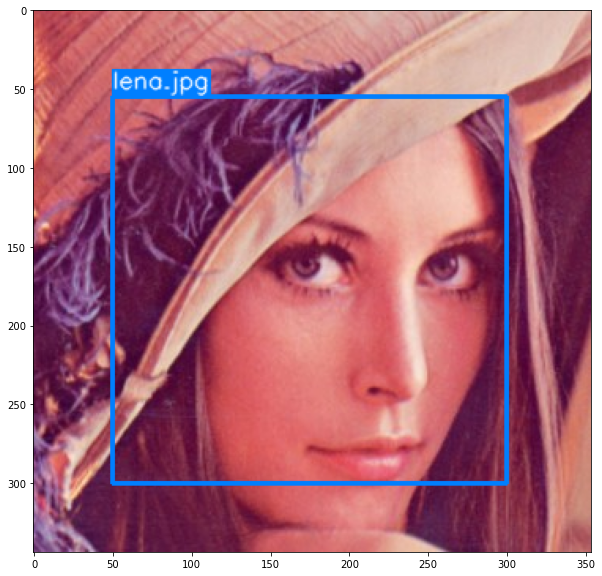

In [33]:
img = cv2.imread('lena.jpg')

(w, h), baseline = cv2.getTextSize("lena.jpg", cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
cv2.rectangle(img,
              (50, 50 + baseline),  
              (300, 300), 
              (255,127,0), 
              2)
cv2.rectangle(img,
              (50, 50 - h),  
              (50 + w, 50 + baseline), 
              (255,127,0), 
              -1) 
cv2.putText(img, 
            "lena.jpg", 
            (50, 50),                   
            cv2.FONT_HERSHEY_SIMPLEX,     
            0.5,                          
            (255,255,255),                
            1,
            cv2.LINE_AA) 

plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])


- wrap into **function**  `draw_ped()`

In [35]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

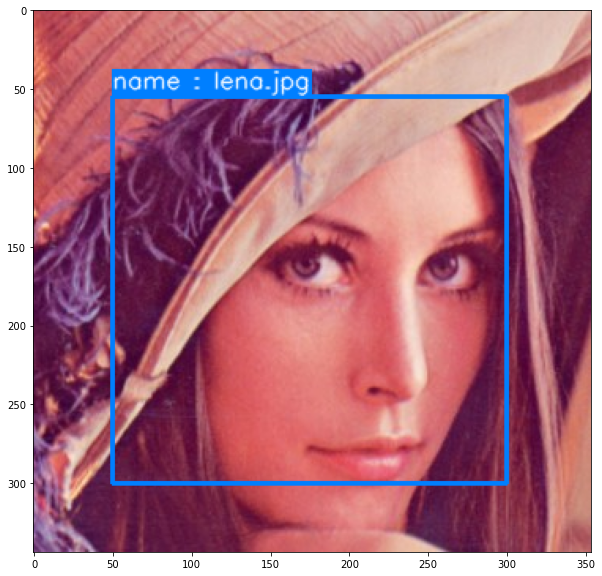

In [38]:
img = cv2.imread('lena.jpg')

img = draw_ped(img, "name : lena.jpg",50, 50, 300, 300)

plt.figure(figsize=(10,10))
plt.imshow(img[:,:,::-1])

___
## 2. Casecade Classifier
<img src="resource/lena_face.png" style="width:250px"></img><br>
- Object Detection OpenCV is using **Haar feature-based cascade classifiers.**
- Is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001.
- **Haar features** just like normal convolutional kernel, <br><br>
<img src="resource/haar_feature.png"></img><br><br>
- Each feature is a single value obtained by **subtracting** sum of pixels under the **white rectangle** from sum of pixels under the **black rectangle**. <br><br>
<img src="resource/face_haar_feature.png" style="width:600px"></img><br><br>
- `lena.jpg` convolving proses to detect face using haar feature, <br><br>
<img src="resource/convolving_haar_feature.gif" style="width:250px"></img>

- Class `cv2.CascadeClassifier()` digunakan untuk membaca classifier file (**.xml**)
- Pada class `cv2.CascadeClassifier()` terdapat method `.detectMultiscale()` untuk melakukan deteksi objek pada sebuah citra.

- Method `.detectMultiscale()` memiliki beberapa parameter input,
    - `scaleFactor` : Ukuran seberapa besar input image direduksi agar mampu dibaca oleh detector algorithm. Hal inilah yang memungkinkan algorima dapat mendeteksi wajah dalam beragam skala gambar (multi scale image).
    - `minNeighbors` : Ukuran minimum antara posisi face rectangle satu terhadap lainya. Hal ini berkaitan dengan method `.detectMultiscale()` yang akan melakukan sliding window terhadap image. Jika kita set ke 0, maka banyak false positive face rectangle terdeteksi. sehingga kita akan pilih nilai yang lebih tinggi. Namun jangan sampai memilih nilai yang terlalu besar, yang mengakibatkan true positive face rectangle menjadi tidak terdeteksi.
    - `flags` : Parameter yang sama pada method cvHaarDetectObjects. Ini tidak digunakan pada Cascade Classifier terbaru.
    - `minSize` : Ukuran object minimal. Ukuran yang lebih kecil tidak akan dimasukan kedalam detected object.
    - `maxSize` : Ukuran object maksimal. Ukuran yang lebih besar tidak akan dimasukan kedalam detected object.

- Face Detection (`haarcascade_frontalface_default.xml`)

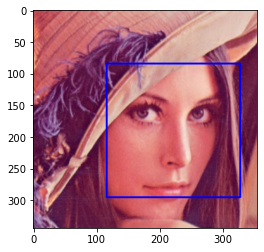

In [39]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

img = cv2.imread("lena.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img[:,:,::-1])

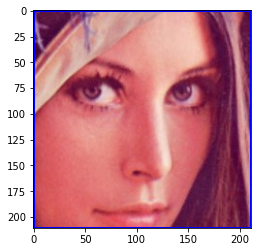

In [40]:
img_face = img[y:y+h, x: x+w]

plt.imshow(img_face[:,:,::-1])

- Detect Face from Camera

In [41]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        cv2.imshow('Detect Face', frame)
        if cv2.waitKey(25) == ord('q'):
            break
    else :
        break

cv2.destroyAllWindows()
cap.release()

- Using custom box (`draw_ped()`)

In [42]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

- Apply to Image

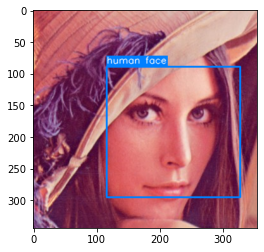

In [43]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

img = cv2.imread("lena.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = draw_ped(img, "human face", x, y, x + w, y + h)

plt.imshow(img[:,:,::-1])

- Apply to video realtime

In [44]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            frame = draw_ped(frame, "human face", x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(25) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

- apply facedetection for all image dataset
    - read, detect face, crop, resize & convert to gray

In [45]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
        for (x, y, w, h) in faces:
            img_face = img_gray[y:y+h, x:x+w]  # crop face image 
            img_resize = cv2.resize(img_face, (100, 100)) # resize to 100 x 100 pixel
            
            image_list.append(img_resize)
            labels.append(folder) # append label (name) of image

In [46]:
len(image_list)

20

- show detected face

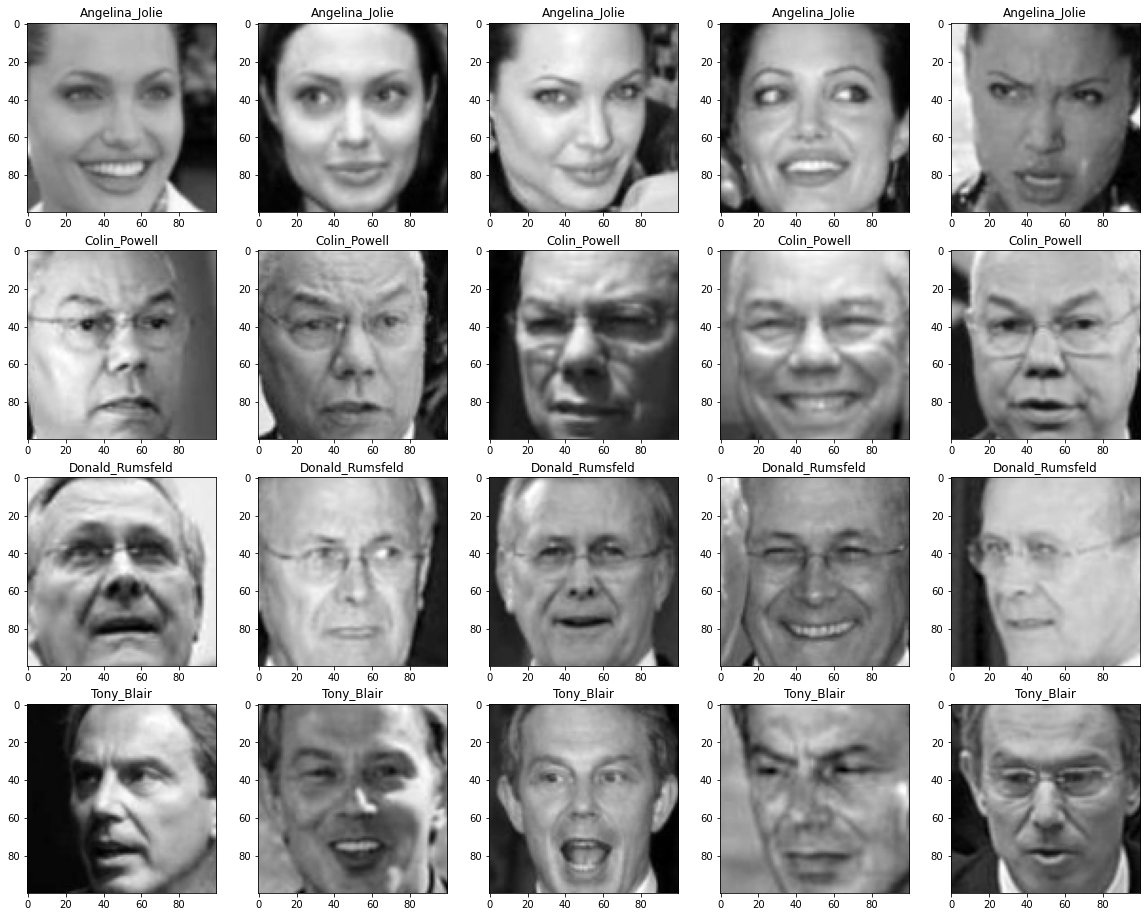

In [47]:
plt.figure(figsize=(20,16))
for i in range(len(image_list)):
    
    img = image_list[i]
    plt.subplot(4, 5, i + 1)
    plt.title(labels[i])
    plt.imshow(img, cmap="gray") # doesn't need reverse matrix, since image_list only 2D (grayscale)

- save detected face into folder

In [48]:
if not os.path.exists("croped_face") :
    os.mkdir("croped_face")

In [49]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)

___
# 3. Eigenface

- install library Scikit-Learn

In [ ]:
! pip install scikit-learn

## 3.1 Eigenface Concept

- Merupakan sekumpulan **eigenvectors** yang digunakan pada computer vision untuk kebutuhan **face recognition**. 
- **Eigenvectors** diturunkan dari **covariance matrix** dari probability distribution pada **high-dimensional vector space** gambar wajah. 
- Eigenfaces sendiri membentuk basis set semua gambar yang digunakan untuk membangun **covariance matrix**. 
- Ini akan **mereduksi dimensi** gambar wajah menjadi kumpulan gambar yang lebih kecil yang dapat mewakili gambar aslinya pada training dataset.<br><br>
![](resource/eigenface.png)

- Pada praktiknya untuk mendapatkan Eigenface digunakan teknik seperti **PCA (Principal Component Analysis)**. 
- PCA merupakan teknik **dimentionality reduction** yang dapat menghasilkan output data dengan dimensi rendah dari input data berdimensi tinggi seperti gambar wajah.

- PCA dihitung dalam dua langkah sebagai berikut :
    - Menghitung **covariance matrix** dari input gambar (original image)
    - Melakukan **eigenvalue decomposition** pada covariance matrix yang didapatkan<br><br><br>
![](resource/eigenface2.png)

## 3.2 Calculate Eigenface using Numpy

In [50]:
import numpy as np

- create dummy data

In [52]:
x = np.array([[ 0.5,  0.8,  1.5, -2.4], 
              [-1.9, -8.7,  0.02, 4.9], 
              [ 5.5,  6.1, -8.1,  3.0]])

- Calculate Center of data point

In [53]:
x.mean(axis=0)

array([ 1.36666667, -0.6       , -2.19333333,  1.83333333])

In [55]:
X = x - x.mean(axis=0) # Center data points

In [56]:
X

array([[-0.86666667,  1.4       ,  3.69333333, -4.23333333],
       [-3.26666667, -8.1       ,  2.21333333,  3.06666667],
       [ 4.13333333,  6.7       , -5.90666667,  1.16666667]])

### 3.2.1 Calculate Covariance Matrix

- Covariance Matrix : 
    - Covariance Matrix provides the a measure of **strength of correlation between two variable or more** set of variables. 
    - The covariance matrix element `Cij` is the covariance of `xi` and `xj`. 
        - If `COV(xi, xj)` = 0 then variables are uncorrelated
        - If `COV(xi, xj)` > 0 then variables positively correlated
        - If `COV(xi, xj)` < 0 then variables negatively correlated
    - it is a symmetric, **dxd** matrix (where **d** is the number of **features**).
    - number of feature is `min(sample_dimension, number_of_samples)`
    - in this case, `sample_dimension` is 10000 (flatten vector for 100x100 pixel face grayscaled data)
![](resource/sample.png)


- Calculate Covariance Matrix

In [57]:
cov = np.cov(X.T) 

In [58]:
cov

array([[ 14.25333333,  26.47      , -17.42266667,  -0.76333333],
       [ 26.47      ,  56.23      , -26.166     , -11.475     ],
       [-17.42266667, -26.166     ,  26.71413333,  -7.86933333],
       [ -0.76333333, -11.475     ,  -7.86933333,  14.34333333]])

- `np.cov` is equal to dot operation of matrix with the transposed matrix * 0.5

In [59]:
np.dot(X.T, X) * 0.5

array([[ 14.25333333,  26.47      , -17.42266667,  -0.76333333],
       [ 26.47      ,  56.23      , -26.166     , -11.475     ],
       [-17.42266667, -26.166     ,  26.71413333,  -7.86933333],
       [ -0.76333333, -11.475     ,  -7.86933333,  14.34333333]])

### 3.2.2 Concept Eigenvalue and Eigenvector

- Eigenvalue Decomposition of covariance matrix <br>
![](resource/eigenvalue.png)
- where :
    - **λ** : Eigenvalue
    - **v** : Eigenvector
    - **A** : Input Matrix (in this case would be Covariance Matrix from pre. step)
- Can be stated equivalently as, <br>
![](resource/eigenvalue2.png)
- where ***I*** is the matrix identity 

- Contoh Soal : <br>
![](resource/eigen1.jpg)<br>
- Jawaban : <br>
![](resource/eigen11.jpg)
- Detail contoh persoalan Nilai Eigen : https://istanamengajar.wordpress.com/2014/01/28/soal-dan-pembahasan-nilai-dan-vektor-eigen-suatu-matriks/

### 3.2.3 Calculate Eigenvalue and Eigenvector

In [60]:
evals, evecs = np.linalg.eig(cov)

In [61]:
evecs

array([[-0.40277393,  0.10823093,  0.57535863,  0.52185694],
       [-0.78952397, -0.31984944, -0.52318252,  0.16555636],
       [ 0.4559871 , -0.58814955, -0.29996066,  0.65567358],
       [ 0.08062765,  0.73488945, -0.55250891,  0.51995055]])

- Flip sign

In [62]:
evecs = np.negative(evecs)

In [63]:
evecs

array([[ 0.40277393, -0.10823093, -0.57535863, -0.52185694],
       [ 0.78952397,  0.31984944,  0.52318252, -0.16555636],
       [-0.4559871 ,  0.58814955,  0.29996066, -0.65567358],
       [-0.08062765, -0.73488945,  0.55250891, -0.51995055]])

- Sort Eigenvalue as descending (largest to small)

In [64]:
idx = evals.argsort()[::-1] # Sort descending and get sorted indices
evals = evals[idx] 
evecs = evecs[:,idx] 

- Eigen Vector

In [69]:
K = 3

evecs[:, :K].T

array([[ 0.40277393,  0.78952397, -0.4559871 , -0.08062765],
       [-0.10823093,  0.31984944,  0.58814955, -0.73488945],
       [-0.57535863,  0.52318252,  0.29996066,  0.55250891]])

In [70]:
X

array([[-0.86666667,  1.4       ,  3.69333333, -4.23333333],
       [-3.26666667, -8.1       ,  2.21333333,  3.06666667],
       [ 4.13333333,  6.7       , -5.90666667,  1.16666667]])

- Projecting Input to PCA

In [71]:
X.dot(evecs[:, :K])

array([[-5.86525831e-01,  5.82485371e+00, -8.88178420e-16],
       [-8.96738194e+00, -3.18911605e+00,  4.44089210e-16],
       [ 9.55390777e+00, -2.63573766e+00,  2.22044605e-16]])

## 3.3 Calculate PCA using Scikit-Learn

In [72]:
from sklearn.decomposition import PCA

In [75]:
K = 3
pca = PCA(n_components=K).fit(x)

- Eigenvector

In [76]:
evecs = pca.components_

evecs

array([[ 0.40277393,  0.78952397, -0.4559871 , -0.08062765],
       [-0.10823093,  0.31984944,  0.58814955, -0.73488945],
       [ 0.90792607, -0.33072433,  0.24391414, -0.08244734]])

- Projecting Input to PCA

In [77]:
pca.transform(x)

array([[-5.86525831e-01,  5.82485371e+00,  6.10622664e-16],
       [-8.96738194e+00, -3.18911605e+00,  1.94289029e-15],
       [ 9.55390777e+00, -2.63573766e+00, -1.48492330e-15]])

## 3.4 Calculate PCA using OpenCV

In [78]:
import cv2

- calculate PCA

In [79]:
K = 3

mean, eigen_vec = cv2.PCACompute(x, mean=None, maxComponents=K)

- Eigenvector

In [80]:
eigen_vec

array([[ 0.40277393,  0.78952397, -0.4559871 , -0.08062765],
       [-0.10823093,  0.31984944,  0.58814955, -0.73488945],
       [ 0.35884904, -0.35884904, -0.53827356,  0.67284196]])

- Projecting Input to PCA

In [81]:
np.dot(X, eigen_vec.T)

array([[-0.58652583,  5.82485371, -5.64977914],
       [-8.96738194, -3.18911605,  2.60644022],
       [ 9.55390777, -2.63573766,  3.04333893]])

## 4. Apply PCA to All Face Croped Dataset

In [82]:
image_faces= []
labels = []

for folder in os.listdir("croped_face"):
    for file in os.listdir("croped_face/" + folder):
        img = cv2.imread("croped_face/" + folder + "/" + file, 0)
        flatten_vector = img.flatten() 
        image_faces.append(flatten_vector)
        labels.append(folder) # append label (name) of image

In [83]:
image_faces[0].shape # 1D vector from 100x100 pixel face image 

(10000,)

- Calculate PCA

In [84]:
h, w = 100, 100

In [109]:
K = 5
pca = PCA(n_components=K).fit(image_faces)

- Show Eigenface

In [110]:
eigenfaces = pca.components_.reshape((K, h, w))

In [111]:
r = np.unique(labels).shape[0]
c = int(len(labels)/r)  

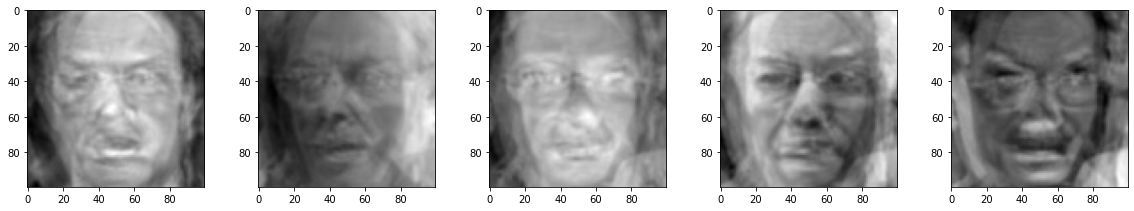

In [112]:
plt.figure(figsize=(20, 15))
for i in range(K):
    plt.subplot(r, c, i + 1)
    plt.imshow(eigenfaces[i], cmap="gray")

- Projecting Input data to PCA

In [113]:
pca_face = pca.transform(image_faces)

- Each image vector with size 10000 is represent by PCA transform output of size 5

In [114]:
pca_face[0]

array([ -775.02869478, -2548.65768414,   804.67069254,  -169.12123096,
        1175.23961046])

In [115]:
pca_face[0].shape

(5,)

### 5. Recomended Method
- Using Scikit-Learn : 
    - Provide method `.fit()`, `.transform()`. Important part when talking about splitting dataset
    - Saved PCA state ada **pickle object**

In [ ]:
! pip install pickle-mixin

- save PCA object

In [116]:
import pickle

def save_pca_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_pca_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [117]:
save_pca_model(pca, "pca_model.pkl")

- load PCA object

In [118]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

loaded_pca = read_pca_model("pca_model.pkl")

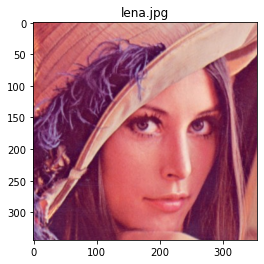

Projection Input into PCA :
[[ -641.73771298 -1564.14948278   218.15131357    77.65896811
    869.43954149]]


In [119]:
img = cv2.imread("lena.jpg")
plt.title("lena.jpg")
plt.imshow(img[:,:,::-1])
plt.show()
    
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for (x, y, w, h) in faces:
    img_face = img_gray[y:y+h, x:x+w]
    
    img_resize = cv2.resize(img_face, (100,100))
    flatten_vector = img_resize.flatten()

    print("Projection Input into PCA :")
    print(pca.transform([flatten_vector]))
